# Least Squares Method with Keras
### Kerasを使った最小自乗法

注意：このノートブックはPython3および(GPUを用いない)CPU環境で動作するように設定されています。<br>
Google Colab環境にてオンラインで実行する場合、オリジナルサイトのコードを使って下さい。<br>
GPUの有無に関わらずPython 3.x および　TensorFlow 2.xにて1.x環境を実行可能にする設定（ないしTensorFlow 1.x） にて、オフラインにて稼動するよう変更しています。<br>
2020/02/04: By H.Nishiyama<br>
2021/10/12 追加・変更部分のみ日本語化<br>

このノートブックはTensorFlow 2.x (ないし1.x）を使います<br>
*もし、オンラインのCloabシステムを使うなら、オリジナルサイトのコードを使うか、次のセルを指示通りに修正して下さい。<br>
【オリジナルサイト】https://github.com/enakai00/colab_tfbook<br>
オリジナルではTensorFlow 2.x を対象としています。<br>
[LSM-08] にて100000回繰り返す部分を**GPU有りで実行するとCPUのみでの実行と比較して倍以上の時間を費やす**ことがあります。<br>
従いまして、強制的にCPUでの実行を行うよう、関連部分に<br>
with tf.device('/CPU:0'):<br>
を入れました。<br>
参考）https://www.tensorflow.org/guide/gpu?hl=ja<br>

In [1]:
###%tensorflow_version 2.x

####[LSM-01]
Import modules.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from pandas import DataFrame

from tensorflow.keras import layers, models

####[LSM-02]
Prepare the training dateset.

In [3]:
train_t = np.array([5.2, 5.7, 8.6, 14.9, 18.2, 20.4,
                    25.5, 26.4, 22.8, 17.5, 11.1, 6.6])
train_t = train_t.reshape([12, 1])
train_x = np.array([[mon**n for n in range(1, 5)]
                    for mon in range(1, 13)])

####[LSM-03]
`train_x` contains the list $[x, x^2, x^3, x^4]$ for $x=1,...,12$.

In [4]:
train_x

array([[    1,     1,     1,     1],
       [    2,     4,     8,    16],
       [    3,     9,    27,    81],
       [    4,    16,    64,   256],
       [    5,    25,   125,   625],
       [    6,    36,   216,  1296],
       [    7,    49,   343,  2401],
       [    8,    64,   512,  4096],
       [    9,    81,   729,  6561],
       [   10,   100,  1000, 10000],
       [   11,   121,  1331, 14641],
       [   12,   144,  1728, 20736]])

####[LSM-04]
`train_t` contins the corresponding lables for $x=1,...,12$.

In [5]:
train_t

array([[ 5.2],
       [ 5.7],
       [ 8.6],
       [14.9],
       [18.2],
       [20.4],
       [25.5],
       [26.4],
       [22.8],
       [17.5],
       [11.1],
       [ 6.6]])

####[LSM-05]
Define a model to predict labels using a polynomal function.<br>
*Waring will be occured for some version of TensorFlow as follows;<br>
WARNING:tensorflow:From ...

In [6]:
with tf.device('/CPU:0'):
    model = models.Sequential()
    model.add(layers.Dense(1, input_shape=(4,), name='polynomial'))
    model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
polynomial (Dense)           (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


####[LSM-06]
Compile the model using the Adam optimizer, and MSE (Mean Square Error) as a loss function.<br>
*Waring will be occured for some version of TensorFlow as follows;<br>
WARNING:tensorflow:From ...

In [7]:
with tf.device('/CPU:0'):
    model.compile(optimizer='adam', loss='mse')


####[LSM-07]
Apply the optimization for 10 epochs.<br>
*Waring will be occured for some version of TensorFlow as follows;<br>
WARNING:tensorflow:From ...

In [8]:
with tf.device('/CPU:0'):
    history = model.fit(train_x, train_t, batch_size=12, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 233ms/step - loss: 3232212.0000
Epoch 2/10
1/1 [==============================] - 0s 2ms/step - loss: 3199768.7500
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 3167492.7500
Epoch 4/10
1/1 [==============================] - 0s 3ms/step - loss: 3135388.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/step - loss: 3103456.2500
Epoch 6/10
1/1 [==============================] - 0s 2ms/step - loss: 3071701.0000
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 3040125.0000
Epoch 8/10
1/1 [==============================] - 0s 3ms/step - loss: 3008730.2500
Epoch 9/10
1/1 [==============================] - 0s 3ms/step - loss: 2977520.2500
Epoch 10/10
1/1 [==============================] - 0s 2ms/step - loss: 2946495.7500


####[LSM-08]
Apply the optimization for additional 100,000 epochs.<br>
*The total time can be estimated from upper data.<br>
*For "x ms / setp", the total is estimated as "x * 100 sec".<br>
*You can chage the following epochs as you want.

In [9]:
with tf.device('/CPU:0'):
    history = model.fit(train_x, train_t,
                        batch_size=12, epochs=100000, verbose=0)

####[LSM-09]
Plot charts to see how the loss has changed.

<AxesSubplot:>

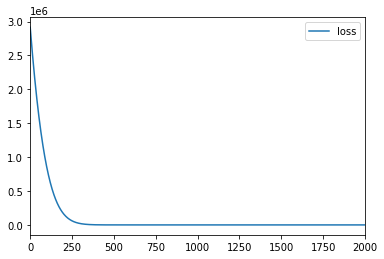

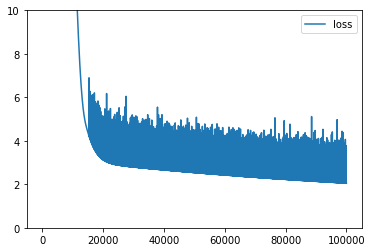

In [10]:
DataFrame({'loss': history.history['loss']}).plot(xlim=(0, 2000))
DataFrame({'loss': history.history['loss']}).plot(ylim=(0, 10))

####[LSM-10]
Show weights after the training.

In [11]:
with tf.device('/CPU:0'):
    mw = model.get_weights()

print(mw)

[array([[-0.35978884],
       [ 1.4212987 ],
       [-0.16085316],
       [ 0.00386482]], dtype=float32), array([2.5904803], dtype=float32)]


####[LSM-11]
Define a function to predict values using the final weights.

In [12]:
with tf.device('/CPU:0'):
    w, b = model.get_weights()

def predict(x):
    pred = b[0] + sum([w[n][0] * x**(n+1) for n in range(0, 4)])
    return pred

####[LSM-12]
Plot a chart for predictions.

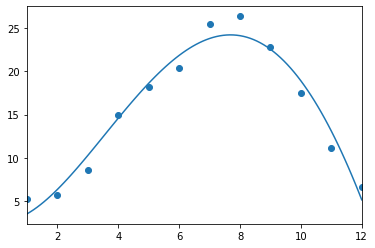

In [13]:
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xlim(1, 12)
subplot.scatter(range(1, 13), train_t)
xs = np.linspace(1, 12, 100)
ys = predict(xs)
subplot.plot(xs, ys)